In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use('default')

In [427]:
# new data with extra
with open('../data/features/'  + 'features_extra.pickle', 'rb') as file:
     features = pickle.load(file)

In [4]:
with open('../data/features/'  + 'features.pickle', 'rb') as file:
     features = pickle.load(file)

In [5]:
dict_list = list(features)

print('NUMEBR OF CASE_ID: ', len(dict_list))

print(dict_list)

feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), features[dict_list[0]] )))
print('NUMBER OF FEATURES: ', len(feature_names))

NUMEBR OF CASE_ID:  39
[('BO90', 'T25mm'), ('BO85', 'T2'), ('BO68', 'T2'), ('BO64', 'T2'), ('BO33', 'T2AX'), ('BO38', 'T2AXAlta'), ('BO38', 'T2AXbassa'), ('BO56', 'T2'), ('BO56', 'T25mm'), ('BO31', 't2DEF'), ('BO47', 'T2'), ('BO71', 'T2'), ('BO42', 'T2AX'), ('BO1', 'T2AX'), ('BO52', 'T2'), ('BO51', 'T2'), ('BO44', 'T2AX'), ('BO82', 'T2'), ('BO32', 'T2AX'), ('BO11', 'T2AX'), ('BO49', 'T2'), ('BO16', 'T2AX'), ('BO29', 'T2AX'), ('BO78', 'T2'), ('BO26', 'T2AX'), ('BO63', 'T2'), ('BO66', 'T2'), ('BO48', 'T2'), ('BO50', 'T2'), ('BO35', 'T2AX'), ('BO74', 'T2'), ('BO76', 'T2'), ('BO18', 'T2AX'), ('BO2', 'T2AX'), ('BO60', 'T2'), ('BO45', 'T2'), ('BO43', 'T2AX'), ('BO75', 'T2'), ('BO61', 'T2')]
NUMBER OF FEATURES:  100


In [6]:
sorted_list = sorted(dict_list, key=lambda x: int(x[0].replace('BO', '')))
print(sorted_list)

[('BO1', 'T2AX'), ('BO2', 'T2AX'), ('BO11', 'T2AX'), ('BO16', 'T2AX'), ('BO18', 'T2AX'), ('BO26', 'T2AX'), ('BO29', 'T2AX'), ('BO31', 't2DEF'), ('BO32', 'T2AX'), ('BO33', 'T2AX'), ('BO35', 'T2AX'), ('BO38', 'T2AXAlta'), ('BO38', 'T2AXbassa'), ('BO42', 'T2AX'), ('BO43', 'T2AX'), ('BO44', 'T2AX'), ('BO45', 'T2'), ('BO47', 'T2'), ('BO48', 'T2'), ('BO49', 'T2'), ('BO50', 'T2'), ('BO51', 'T2'), ('BO52', 'T2'), ('BO56', 'T2'), ('BO56', 'T25mm'), ('BO60', 'T2'), ('BO61', 'T2'), ('BO63', 'T2'), ('BO64', 'T2'), ('BO66', 'T2'), ('BO68', 'T2'), ('BO71', 'T2'), ('BO74', 'T2'), ('BO75', 'T2'), ('BO76', 'T2'), ('BO78', 'T2'), ('BO82', 'T2'), ('BO85', 'T2'), ('BO90', 'T25mm')]


In [7]:
samples = np.zeros((len(sorted_list), len(feature_names)))

for k, case_id in enumerate(sorted_list):
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, features[case_id][feature_name])
    samples[k, ...] = a

#for possible NaNs
samples = np.nan_to_num(samples)

samples.shape

(39, 100)

In [8]:
sorted_ID = list(map(lambda x: x[0], sorted_list))
print(sorted_ID)

['BO1', 'BO2', 'BO11', 'BO16', 'BO18', 'BO26', 'BO29', 'BO31', 'BO32', 'BO33', 'BO35', 'BO38', 'BO38', 'BO42', 'BO43', 'BO44', 'BO45', 'BO47', 'BO48', 'BO49', 'BO50', 'BO51', 'BO52', 'BO56', 'BO56', 'BO60', 'BO61', 'BO63', 'BO64', 'BO66', 'BO68', 'BO71', 'BO74', 'BO75', 'BO76', 'BO78', 'BO82', 'BO85', 'BO90']


In [9]:
d = pd.DataFrame(data=samples, columns=feature_names, index=sorted_ID)
df = d.groupby(d.index, sort=False).mean()
df

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
BO1,429.0,798.0,1.336950e+09,4.536893,192.00,4.809975,1370.0,589.569839,120.627757,557.0,...,42.047592,45.099889,57.140179,58.008620,3550.416667,35.631913,0.358332,3140.879027,0.884651,3594.0
BO2,237.0,390.0,1.990333e+09,3.402873,75.00,5.854507,723.0,311.722498,49.870963,306.0,...,100.079968,139.014388,145.784087,161.198635,19389.291667,80.246340,0.171401,20363.155899,1.050227,19553.0
BO11,154.0,293.0,2.823765e+09,3.169558,65.00,7.140266,744.0,217.377486,44.028965,208.0,...,100.244701,94.047860,101.237345,110.154437,55595.208333,81.328868,0.247490,28463.243811,0.511973,55512.0
BO16,138.0,244.0,3.483271e+08,2.764315,55.00,3.543087,399.0,187.399852,32.846181,182.0,...,57.008771,90.022219,96.462428,97.411498,9376.083333,51.375241,0.262210,8200.670904,0.874637,9451.0
BO18,222.0,370.0,1.556154e+08,3.188206,78.00,2.582487,443.0,297.086268,44.511454,297.0,...,35.014283,33.015148,36.891733,37.749172,1677.000000,27.527861,0.370662,1841.599478,1.098151,1704.0
BO26,191.0,303.0,1.007257e+10,2.917379,57.00,4.066159,610.0,247.838891,35.250953,247.0,...,142.014084,138.014492,144.069428,145.196419,158485.625000,110.110423,0.248722,56941.572313,0.359285,158607.0
BO29,223.0,417.0,1.859944e+09,3.613234,109.00,2.597569,580.0,317.326669,61.116935,314.0,...,82.054860,95.634722,82.462113,99.362971,17205.916667,63.084556,0.159622,20191.865984,1.173542,17507.0
BO31,493.0,1068.0,1.014975e+10,5.202772,309.00,4.431866,2467.0,783.858711,181.529800,780.0,...,75.166482,117.004273,117.153745,118.156676,15058.708333,55.602673,0.238019,12389.802684,0.822767,15217.0
BO32,415.0,735.0,1.043870e+10,4.382560,149.00,6.035520,1618.0,567.493021,101.604343,548.0,...,90.448881,81.154174,99.904955,109.096288,30467.666667,66.116600,0.236993,19905.534047,0.653333,30591.0
BO33,225.0,402.0,3.945180e+09,3.543471,91.00,4.824233,929.0,310.724375,55.974704,305.0,...,87.051709,139.032370,127.000000,142.804062,38187.541667,63.492129,0.188507,29091.849949,0.761815,38741.0


In [10]:
corr = df.corr().fillna(0)
old_names = list(corr.columns)
new_names = list(map(lambda x: x.replace('original_', ''), corr.columns))


corr.rename(columns=dict(zip(old_names, new_names)), inplace=True, index=dict(zip(old_names, new_names)))

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, square=True, cmap="RdBu_r", linewidths=.6)
sns.set(font_scale = 1.5)
plt.title('features correlation heatmap', fontsize=19)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

In [11]:
clinical_df = pd.read_excel('../data/clinical_db_extra.xlsx', sheet_name='data', index_col='PatientID')
clinical_df

,Age,Histology,Sex,DWI\n,Pre-Intervention staging,TRG,CRT neoadjuvant,Therapy 1,Therapy 2,Multiple therapy,Surgery 1,Surgery 2,Multiple surgery,RTE,Repeated RTE,Palliative RTE
PatientID,,,,,,,,,,,,,,,,
BO1,72,1.0,0,0,NaN,2.0,1.0,0.0,NaN,0.0,1.0,NaN,0.0,1.0,NaN,NaN
BO2,58,1.0,1,1,T3aN+,2.0,1.0,2.0,NaN,0.0,1.0,NaN,0.0,2.0,NaN,NaN
BO6,75,NaN,0,0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BO9,60,1.0,1,0,NaN,3.0,1.0,3.0,2.0,1.0,2.0,3.0,1.0,2.0,NaN,NaN
BO11,77,1.0,0,1,T4N1,3.0,1.0,2.0,NaN,0.0,2.0,NaN,0.0,2.0,NaN,NaN
BO15,64,NaN,1,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BO16,65,1.0,0,1,T2,0.0,1.0,2.0,NaN,0.0,1.0,NaN,0.0,2.0,NaN,NaN
BO17,87,1.0,1,1,NaN,2.0,1.0,0.0,NaN,0.0,2.0,NaN,0.0,1.0,NaN,NaN
BO18,87,0.0,0,1,NaN,NaN,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN


/Users/giuseppefilitto/miniforge3/envs/tf2.5/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


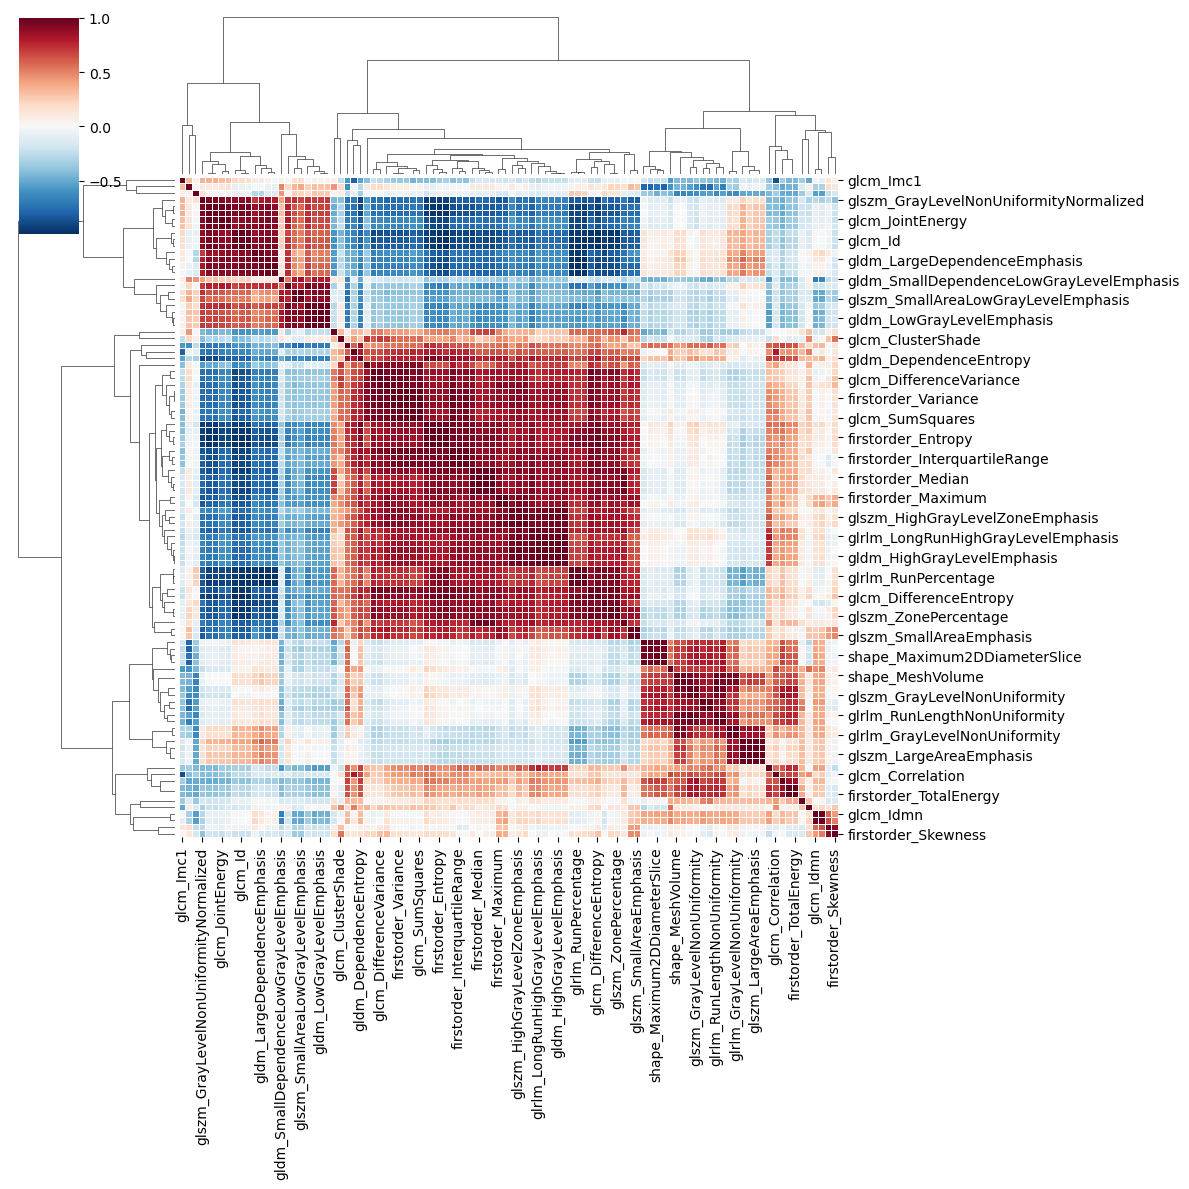

In [12]:
pp = sns.clustermap(corr, linewidths=.6, figsize=(12,12), cmap='RdBu_r')
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()

In [13]:
TRG = clinical_df['TRG']

In [14]:
df = pd.concat([df, TRG], axis=1)
df = df[df['TRG'].notna()]
df = df[df['original_firstorder_Entropy'].notna()]

In [15]:
df

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,TRG
BO1,429.0,798.0,1.336950e+09,4.536893,192.00,4.809975,1370.0,589.569839,120.627757,557.0,...,45.099889,57.140179,58.008620,3550.416667,35.631913,0.358332,3140.879027,0.884651,3594.0,2.0
BO2,237.0,390.0,1.990333e+09,3.402873,75.00,5.854507,723.0,311.722498,49.870963,306.0,...,139.014388,145.784087,161.198635,19389.291667,80.246340,0.171401,20363.155899,1.050227,19553.0,2.0
BO11,154.0,293.0,2.823765e+09,3.169558,65.00,7.140266,744.0,217.377486,44.028965,208.0,...,94.047860,101.237345,110.154437,55595.208333,81.328868,0.247490,28463.243811,0.511973,55512.0,3.0
BO16,138.0,244.0,3.483271e+08,2.764315,55.00,3.543087,399.0,187.399852,32.846181,182.0,...,90.022219,96.462428,97.411498,9376.083333,51.375241,0.262210,8200.670904,0.874637,9451.0,0.0
BO26,191.0,303.0,1.007257e+10,2.917379,57.00,4.066159,610.0,247.838891,35.250953,247.0,...,138.014492,144.069428,145.196419,158485.625000,110.110423,0.248722,56941.572313,0.359285,158607.0,2.0
BO29,223.0,417.0,1.859944e+09,3.613234,109.00,2.597569,580.0,317.326669,61.116935,314.0,...,95.634722,82.462113,99.362971,17205.916667,63.084556,0.159622,20191.865984,1.173542,17507.0,1.0
BO31,493.0,1068.0,1.014975e+10,5.202772,309.00,4.431866,2467.0,783.858711,181.529800,780.0,...,117.004273,117.153745,118.156676,15058.708333,55.602673,0.238019,12389.802684,0.822767,15217.0,2.0
BO32,415.0,735.0,1.043870e+10,4.382560,149.00,6.035520,1618.0,567.493021,101.604343,548.0,...,81.154174,99.904955,109.096288,30467.666667,66.116600,0.236993,19905.534047,0.653333,30591.0,2.0
BO33,225.0,402.0,3.945180e+09,3.543471,91.00,4.824233,929.0,310.724375,55.974704,305.0,...,139.032370,127.000000,142.804062,38187.541667,63.492129,0.188507,29091.849949,0.761815,38741.0,3.0
BO35,139.0,238.0,2.049103e+08,2.720582,52.25,3.784450,353.0,185.792519,31.583666,182.0,...,95.084173,73.061618,102.893148,5554.166667,53.849598,0.193861,7823.574994,1.408596,5668.0,3.0


In [ ]:
df.to_csv('../data/features/feature_extra_csv')

In [16]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef


X = df.drop('TRG', axis=1)
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

<ipython-input-60-cf4548e26fd7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 18)


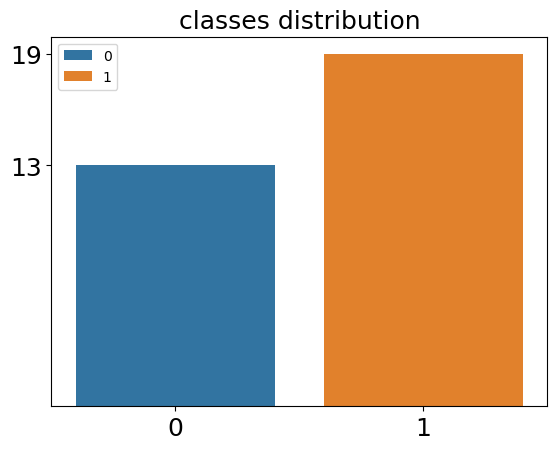

{0: 13, 1: 19}


In [60]:
from  matplotlib.ticker import FuncFormatter

unique, counts = np.unique(y, return_counts=True)
D = dict(zip(unique, counts))

keys = list(D.keys())
vals = [D[k] for k in keys]

plt.style.use('default')

f, ax = plt.subplots()
b = sns.barplot(x=keys, y=vals, hue=keys, dodge=False)
b.set_yticklabels(b.get_yticks(), size = 18)
b.set_xticklabels(b.get_xticks(), size = 18)
ax.set_title('classes distribution', fontsize=18)
plt.yticks([13,19])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: int(y)))
plt.show()

print(D)

In [19]:
#pipeline = make_pipeline(RobustScaler(), PCA(n_components=.95, svd_solver='full'), SVC(C=20, probability=True))

pipeline = make_pipeline(StandardScaler(), PCA(n_components=.9, svd_solver='full'), SVC(C=100, probability=True, random_state=0))

## LOO

In [ ]:
from sklearn.model_selection import LeaveOneOut

# y_pred = cross_val_predict(pipeline, X, y, cv=LeaveOneOut())
# MCC = matthews_corrcoef(y, y_pred)

# print(MCC)

In [20]:
n_splits = 10

M_coeffs = []
for i in range(500):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i + 1)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    MCC = matthews_corrcoef(y, y_pred)
    #M_coeffs[i] = MCC
    M_coeffs.append(MCC)



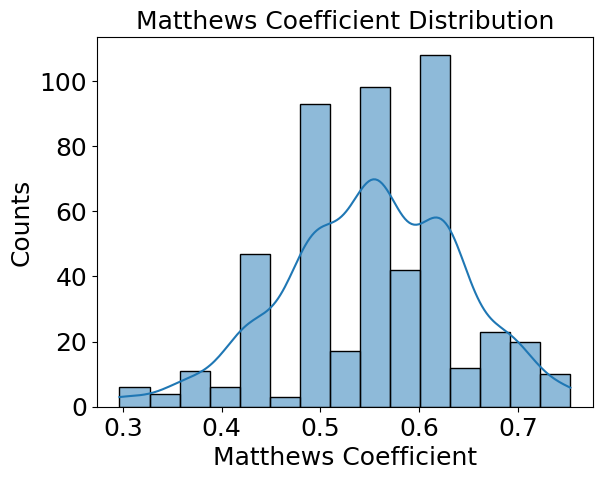

In [21]:
sns.histplot( M_coeffs, kde=True, bins='auto')
plt.title('Matthews Coefficient Distribution', fontsize=18)
plt.xlabel('Matthews Coefficient', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [22]:
mean = np.mean(M_coeffs)
print(mean)

0.5525233855215301


In [23]:
max = np.max(M_coeffs)
print(max)

0.7530836820370708


In [24]:
from scipy import stats
mode = stats.mode(M_coeffs)
print(mode)

ModeResult(mode=array([0.55313398]), count=array([83]))


In [25]:
median = np.median(M_coeffs)
print(median)

0.553133980780464


In [26]:
data = M_coeffs
median = np.argsort(data)[len(data)//2]
print(median)
data[median]

353


0.553133980780464

In [27]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=median + 1)
y_pred = cross_val_predict(pipeline, X, y, cv=skf)
MCC = matthews_corrcoef(y, y_pred)
print(MCC)

0.553133980780464


In [28]:
pipeline.fit(X, y)
pca = pipeline.steps[1][1]
n_pcs = pca.components_.shape[0]

In [29]:
initial_feature_names = X.columns
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_values = [np.abs(pca.components_[i]) for i in range(n_pcs)]
most_important_values_max = [np.abs(pca.components_[i]).max() for i in range(n_pcs)]
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [30]:
most_important

[36, 41, 49, 5, 87, 30]

In [31]:
most_important_values_max

[0.1379056345148748,
 0.21142776257484353,
 0.24788459105425367,
 0.29674111544611687,
 0.3217568434476382,
 0.30417123184216316]

In [32]:
most_important_values[-1][30]

0.30417123184216316

In [33]:
print(f'number of principal components: {n_pcs}')
print((most_important_names))

number of principal components: 6
['original_glcm_JointEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 'original_firstorder_Kurtosis', 'original_shape_Flatness', 'original_glcm_Idn']


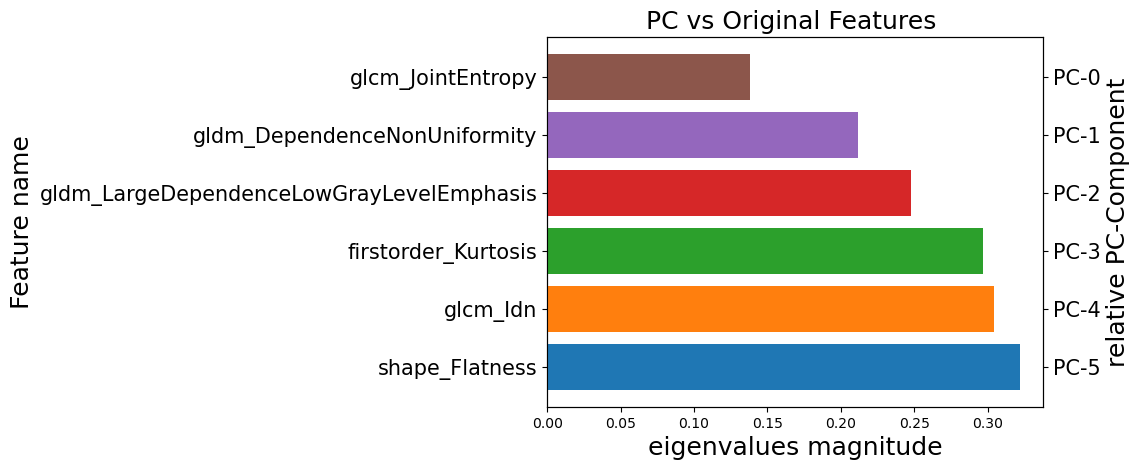

In [34]:
plt.style.use('default')
cmap = sns.color_palette()



zipped_feats = zip(most_important_names, most_important_values_max)
zipped_feats = sorted(zipped_feats, key=lambda x: x[1], reverse=True)
features, importances = zip(*zipped_feats)
top_features = features[:10]
top_importances = importances[:10]


plt.title('PC vs Original Features ', fontsize=18)
p = plt.barh(range(len(top_importances)), top_importances, color=[cmap[x] for x, F in enumerate(top_features)], align='center')
plt.yticks(range(len(top_importances)), list(map(lambda x: x.replace('original_', ''), top_features)), fontsize=15)
plt.xlabel('eigenvalues magnitude', fontsize=18)
plt.ylabel('Feature name', fontsize=18)
ax2 = plt.twinx()
ax2.barh(range(len(top_importances)), top_importances, color=[cmap[x] for x, F in enumerate(top_features)], align='center')
ax2.set_ylabel('relative PC-Component', fontsize=18)
ax2.set_yticks(range(len(top_importances)))
ax2.set_yticklabels(['PC-5','PC-4', 'PC-3', 'PC-2', 'PC-1', 'PC-0'], fontsize=15)
ax.bar_label(p, label_type='center')
plt.show()

In [35]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.77      0.74        13
     class 1       0.83      0.79      0.81        19

    accuracy                           0.78        32
   macro avg       0.77      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32



In [36]:
 from sklearn.metrics import jaccard_score

 jaccard_score(y, y_pred)

0.6818181818181818

Text(0.5, 427.9555555555555, 'Predicted label')

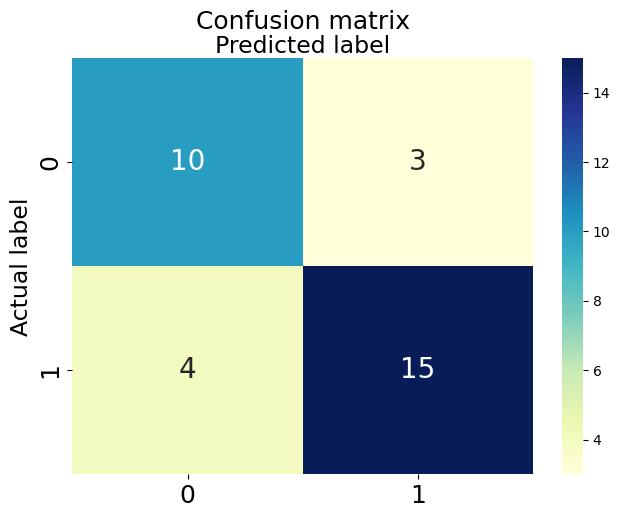

In [37]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=18)
plt.yticks(tick_marks, class_names, fontsize=18)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', annot_kws={"fontsize":20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05, fontsize=18)
plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)

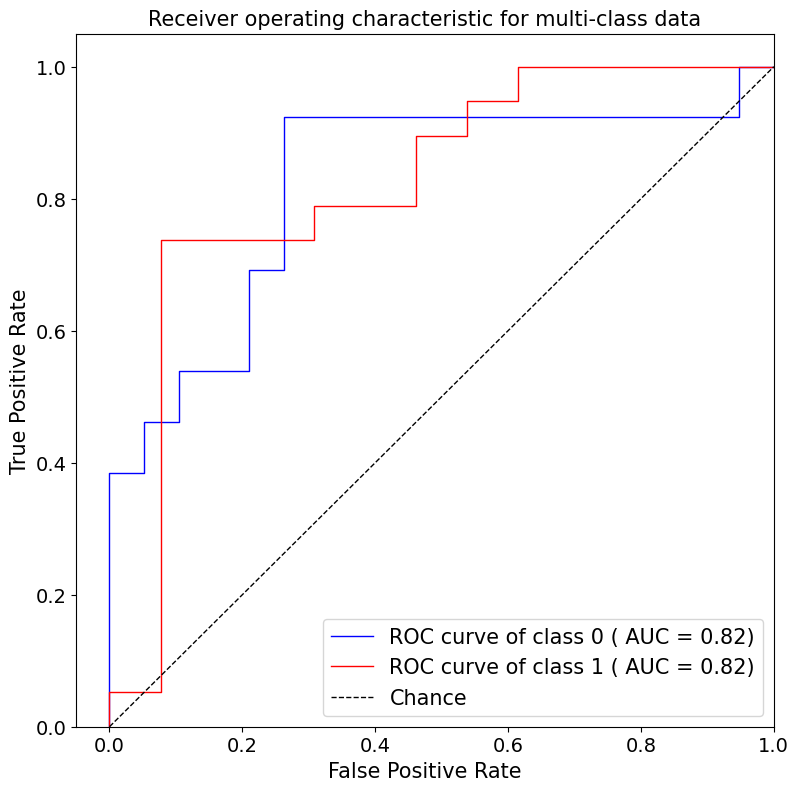

In [38]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_auc_score, roc_curve, auc



X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(9, 9))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} ( AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))



plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic for multi-class data',fontsize=15)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='black',
         label='Chance', )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=15)
plt.show()

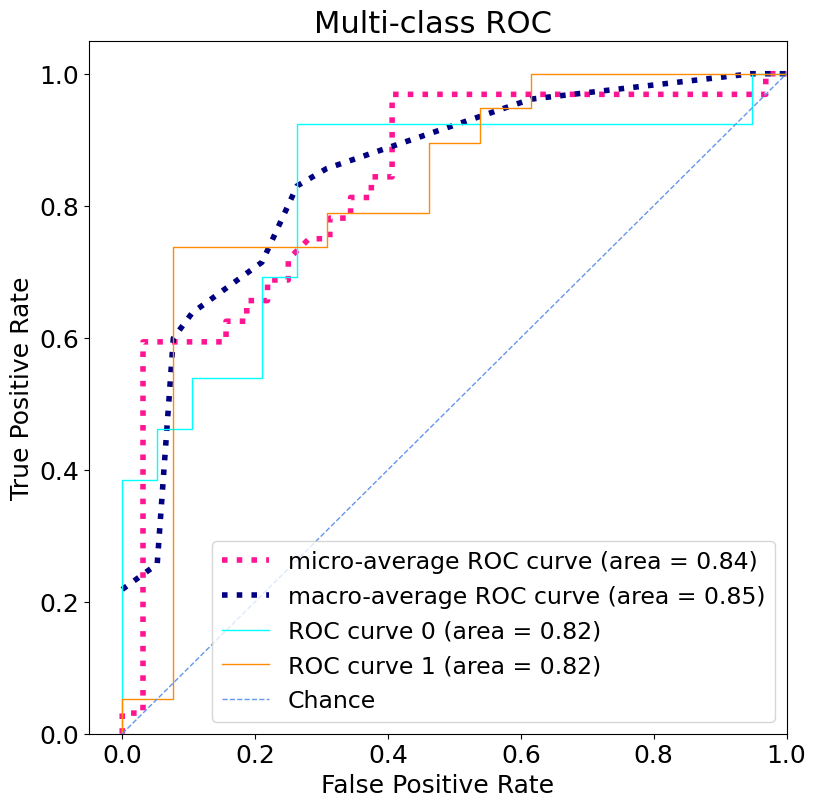

In [39]:

from numpy import interp
from sklearn.metrics import roc_auc_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize


X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(9, 9))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='cornflowerblue',
         label='Chance')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Multi-class ROC ', fontsize=22)
plt.legend(loc="lower right", fontsize=17)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

pipeline_RF = make_pipeline(StandardScaler(), PCA(n_components=6, svd_solver='full'), RandomForestClassifier(n_estimators=100, random_state=42))

y_pred = cross_val_predict(pipeline_RF, X, y, cv=skf)
MCC = matthews_corrcoef(y, y_pred)

print(MCC)

0.2659695218051501


In [41]:
n_splits = 10

M_coeffs = []
for i in range(500):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i + 1)
    y_pred = cross_val_predict(pipeline_RF, X, y, cv=skf)
    MCC = matthews_corrcoef(y, y_pred)
    #M_coeffs[i] = MCC
    M_coeffs.append(MCC)

<AxesSubplot:ylabel='Count'>

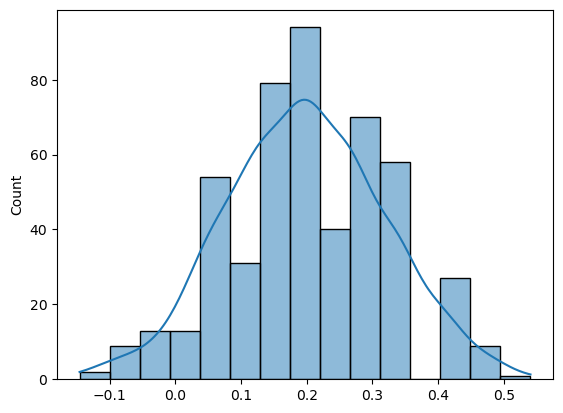

In [42]:
sns.histplot( M_coeffs, kde=True, bins=15)

In [43]:
data = M_coeffs
median = np.argsort(data)[len(data)//2]
print(median)
data[median]

84


0.1901668471529859

## KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier


X = df.drop('TRG', axis=1)
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=6, svd_solver='full'), KNeighborsClassifier(2))


In [45]:
n_splits = 10

M_coeffs = []
for i in range(500):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i + 1)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    MCC = matthews_corrcoef(y, y_pred)
    #M_coeffs[i] = MCC
    M_coeffs.append(MCC)

<AxesSubplot:ylabel='Count'>

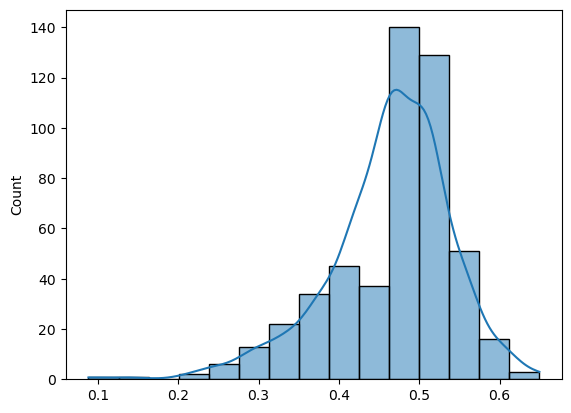

In [46]:
sns.histplot( M_coeffs, kde=True, bins=15)

In [47]:
data = M_coeffs
median = np.argsort(data)[len(data)//2]
print(median)
data[median]

161


0.4646955484874565

In [48]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=median + 1)
y_pred = cross_val_predict(pipeline, X, y, cv=skf)
MCC = matthews_corrcoef(y, y_pred)
print(MCC)

0.4646955484874565


Text(0.5, 427.9555555555555, 'Predicted label')

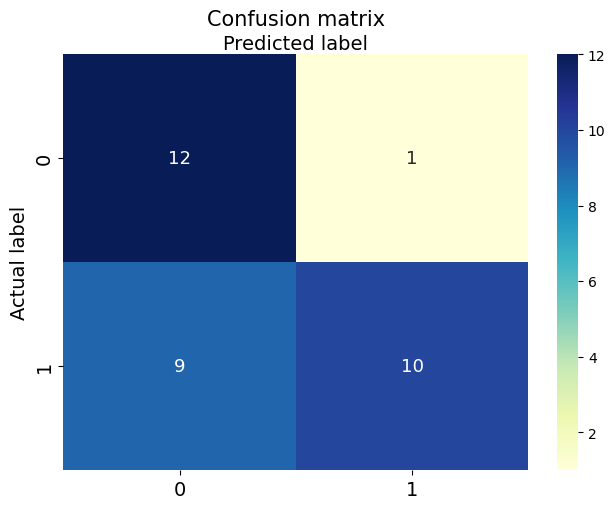

In [49]:
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=14)
plt.yticks(tick_marks, class_names, fontsize=14)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', annot_kws={"fontsize":13})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05, fontsize=15)
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

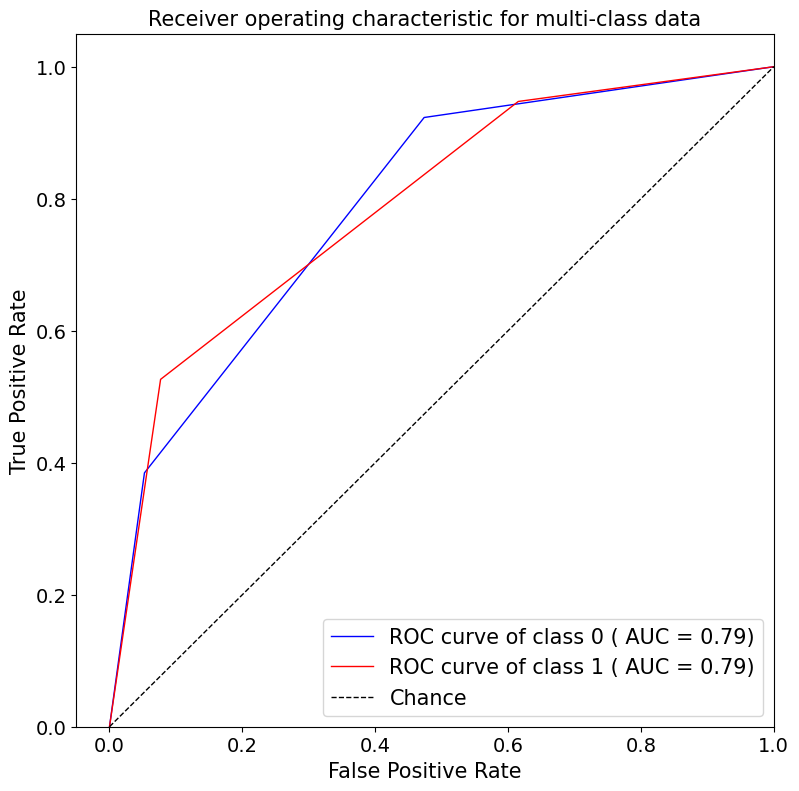

In [50]:
X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(9, 9))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} ( AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))



plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic for multi-class data',fontsize=15)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='black',
         label='Chance', )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=15)
plt.show()

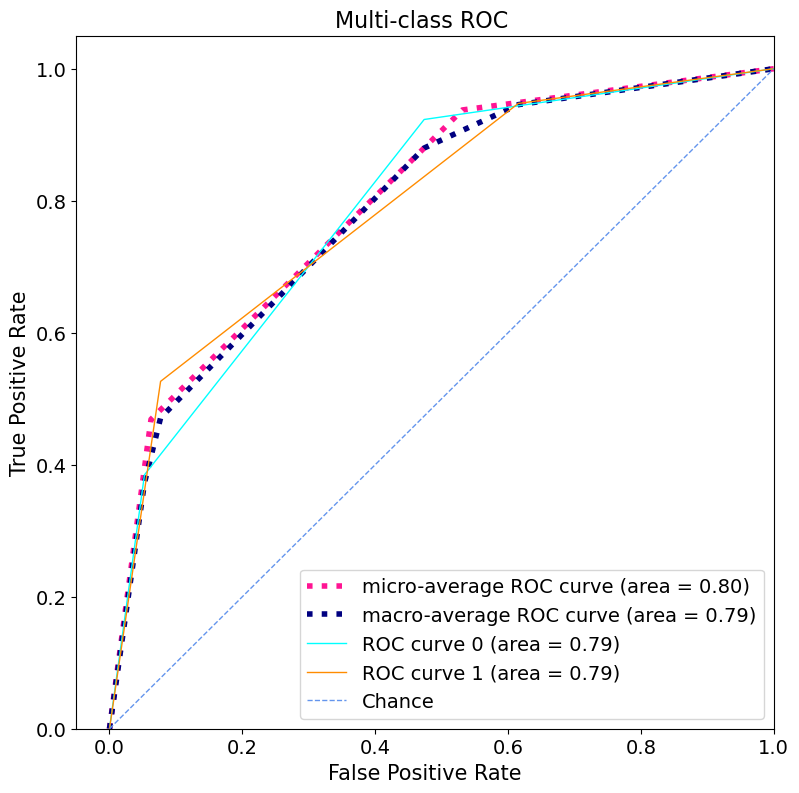

In [51]:
X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(9, 9))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='cornflowerblue',
         label='Chance')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Multi-class ROC ', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Isomap embedding

In [52]:
from sklearn.manifold import LocallyLinearEmbedding

X = df.drop('TRG', axis=1)
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

pipeline = make_pipeline(StandardScaler(), LocallyLinearEmbedding(n_components=6), SVC(C=100, probability=True, random_state=0))

In [53]:
n_splits = 10

M_coeffs = []
for i in range(500):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i + 1)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    MCC = matthews_corrcoef(y, y_pred)
    #M_coeffs[i] = MCC
    M_coeffs.append(MCC)

<AxesSubplot:ylabel='Count'>

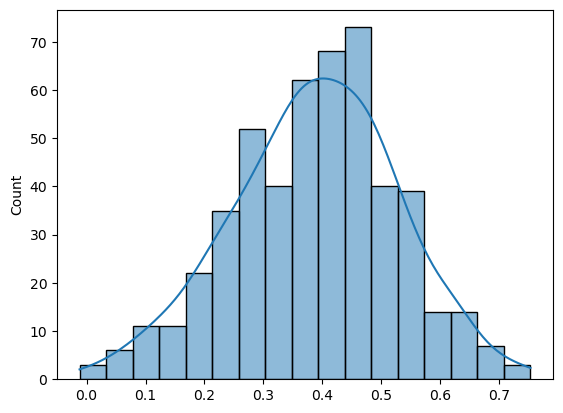

In [54]:
sns.histplot( M_coeffs, kde=True, bins='auto')

In [55]:
data = M_coeffs
median = np.argsort(data)[len(data)//2]
print(median)
data[median]

349


0.3944724048765609

In [56]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=median + 1)
y_pred = cross_val_predict(pipeline, X, y, cv=skf)
MCC = matthews_corrcoef(y, y_pred)
print(MCC)

0.3944724048765609


Text(0.5, 427.9555555555555, 'Predicted label')

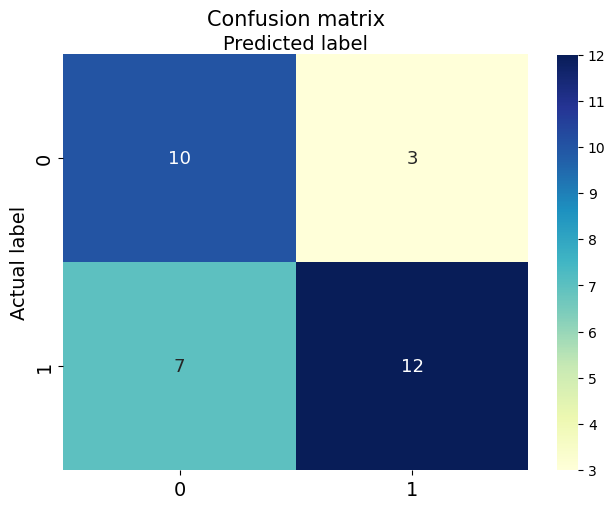

In [57]:
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=14)
plt.yticks(tick_marks, class_names, fontsize=14)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', annot_kws={"fontsize":13})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05, fontsize=15)
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

In [58]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.77      0.67        13
     class 1       0.80      0.63      0.71        19

    accuracy                           0.69        32
   macro avg       0.69      0.70      0.69        32
weighted avg       0.71      0.69      0.69        32



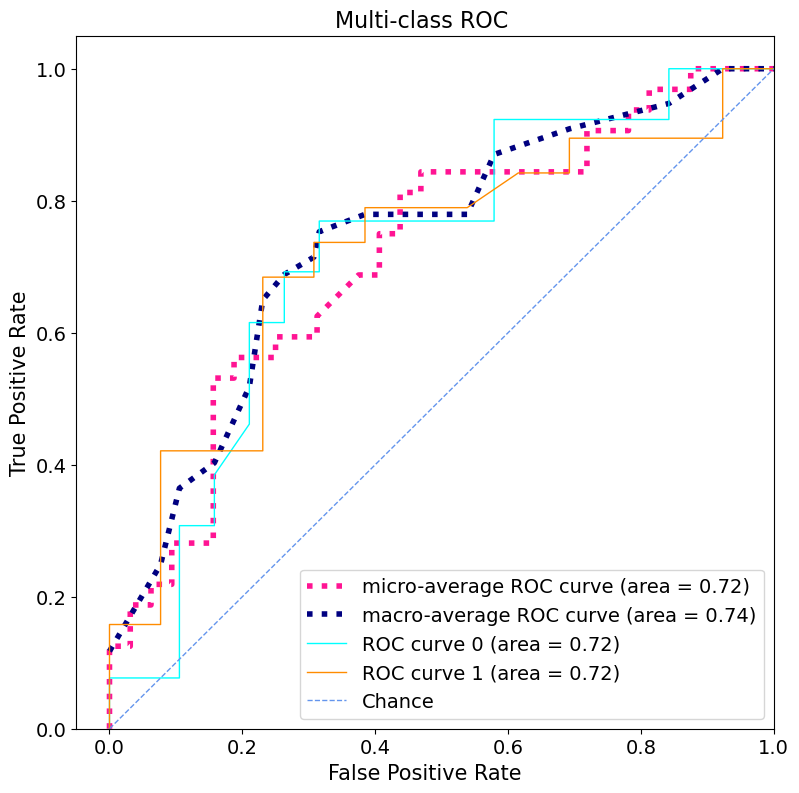

In [59]:
X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(9, 9))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='cornflowerblue',
         label='Chance')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Multi-class ROC ', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()